<center>

# 30vo. CONGRESO DE LA DIVISIÓN DE DINÁMICA DE FLUIDOS - SMF


## Curso 1. Introducción a la simulación de fluidos en medios porosos con Python

### Dra. Gabriela Berenice Díaz Cortés, IMP (gbdiaz@imp.mx)

### Mtra. Zoila Sanchez Lopez, IMP  (poszsanchez@imp.mx)

# Caso de estudio: Simulación numérica de un yacimiento homogeneo unidimensional en coordenadas cartesianas

## Ecuaciones que rigen el flujo de fluidos en medio poroso                

El flujo en un medio poroso es regido por las ecuaciones de balance de masa y Darcy, que combinadas dan lugar a la siguiente ecuación 


$$\frac{\partial}{\partial t}(\phi \rho)-\nabla \cdot \left( \rho \frac{K}{\mu}\cdot \left( \nabla p-\rho g \Delta z\right)\right
)=\rho q\qquad (Ec. 1)$$

en donde la densidad $\rho$ y viscosidad $\mu$ del fluido, y la porosidad $\phi$ de la roca pueden depender de la presión.


Para resolver esta ecuación numéricamente comenzaremos resolviendo un versión simplificada, elegiremos un fluido y una roca incompresibles, lo que implica que $\frac{\partial}{\partial t}(\phi \rho) =0,$ modelaremos flujo en una dimensión ($x$) y omitiremos fuerzas gravitacionales. El sistema a resoves después de estas simplificaciones es:

$$-\frac{d}{dx}  \left( \rho \frac{K}{\mu}\cdot\frac{d}{dx} p\right)=\rho q\qquad (Ec. 2)$$
En el desarrollo del simulador usaremos el método de diferencias finitas para la derivada espacial de la ecuación (Eq.2). 
Selecionando la permeabilidad ($K$) y la viscosidad ($\mu$) constantes, definimos las mobilidades ($\lambda$), como
 $$\lambda = \frac{K}{\mu},$$ 
 con esta definición, la ecuación \eqref{eq:spi} se puede reescribir como:
 \begin{equation} 
-\frac{d}{dx}  \left(\lambda\cdot\frac{d}{dx} p\right)= q
\end{equation}
Discretizando con diferencias finitas centradas en la celda, para la celda $i$ obtenemos:
\begin{equation*}
-p_{i-1}\frac{\lambda_{i-\frac{1}{2}}}{\left( \Delta x\right)^2}  + p_{i} \frac{\lambda_{i+\frac{1}{2}}+\lambda_{i-\frac{1}{2}}}{\left( \Delta x\right)^2}-p_{i+1}\frac{\lambda_{i+\frac{1}{2}}}{\left( \Delta x\right)^2},
\end{equation*}
en donde $\lambda_{i+\frac{1}{2}}$ es el promedio armónico de la mobilidad. Esta discretización da lugar al sistema
$$\mathbf{T}\mathbf{p}=\mathbf{R},$$ en donde $$T_{i+1/2} =\frac{\lambda_{i+1/2}}{\left( \Delta x\right)^2}$$
con $\mathbf{p}$ el vector de presiones y $\mathbf{R}$ el vector del lado derecho. 

 Para las celdas en la frontera con condiciones de Dirichlet, se tiene $$T_{1} =\frac{2\lambda_{1/2}}{\left( \Delta x\right)^2}, \qquad T_{N} =\frac{2\lambda_{N}}{\left( \Delta x\right)^2}.$$


## Simulación

Ahora comenzaremos el simulador. Modelaremos el flujo de un fluido en un medio poroso con permeabilidad y viscosidad constantes y condiciones de Dirichlet en las fronteras, i.e. presiones fijas. El yacimiento tiene una longitud de 10 metros y usaremos una malla con 100 puntos. Los parametros utilizados se resumen a continuación.
* $K   = 1$
* $\mu = 1$
* $L   = 10 [m]$
* $N = 100$
* $P_R = 10,$ $P_L = 0$,    

  
<p> Construye el vector de transmisibilidades.</p>  
<p>&nbsp; &nbsp; 1. Crear los vectores de permeabilidad y viscosidad ($\mathbf{K}, \mu \in \mathbb{N}^{N}$).</p>
<p>&nbsp; &nbsp; 2. Construir el vector de transmisibilidades ($\lambda = \frac{\mathbf{K}}{\mu}  \in \mathbb{N}^{N}$).</p>
<p>&nbsp; &nbsp; 3. Calcular los promedios armónico y aritmético del vector de transmisibilidades </p>

<p>&nbsp; &nbsp; $\lambda_{av} \in \mathbb{N}^{N+1},\quad$     $\lambda_{av}(1) = \lambda(1),\quad$   $\lambda_{av}(N) = \lambda(N)$.</p>
    
<p>&nbsp; &nbsp; 4.  Resolver el sistema lineal con $p = numpy.linalg.solve(T, R)$ . </p>
<p>&nbsp; &nbsp; 5. Graficar la presión.</p>


In [56]:
from IPython.display import Markdown

import numpy as np
import matplotlib.pyplot as plt

# Definicion de funciones
## Funciones para obtener el promedio (A, aritmético, H, armónico)
def Av_A(y):
    N = len(y)
    y_av      = np.zeros(N+1)
    y_av[0]   = y[0]
    y_av[N]   = y[N-1]
    y_av[1:N] = (y[1:N] + y[0:N-1]) / 2
    return(y_av)
def Av_H(y):
    N = len(y)
    y_av      = np.zeros(N+1)
    y_av[0]   = y[0]
    y_av[N]   = y[N-1]
    y_av[1:N] = 2 * (y[1:N] * y[0:N-1]) / (y[1:N] + y[0:N-1])
    return(y_av)

#%% Funcion que calcula las transmisibilidades
def Trans(y,DX):
    N = len(y)
    T = np.zeros(N)    
    DX2 = DX**2
    T[0:N] = y[0:N]/DX2
    return(T)

# Calcular la matriz de transmisibilidades
# Usar condiciones de frontera Dirichlet
def A_mat_D(T):
    N = len(T)-1
    A = np.zeros((N,N))    # Prealocate A
    for i in range(0,N):
        if (i > 0):   # Hay vecino a la izquierda
            # T(i) * (p(i)-p(i-1))
            A[i,i]   =  T[i]
            A[i,i-1] = -T[i]
        if (i < N-1): # Hay vecino a la derecha
            # T(i) * (p(i)-p(i+1))
            A[i,i]  +=  T[i+1]
            A[i,i+1] = -T[i+1]
    # Condiciones de frontera de Dirichlet
    # Condición izquierda
    i = 0
    A[i,i]  +=   2 * T[i]
    i = N-1
    # Condición Derecha
    A[i,i]   +=  T[i] + T[i-1]
    A[i,i-1] +=  T[i] - T[i-1]
    return(A)
    
# Vector del lado derecho
def bc_D(T,PL,PR):
    N = len(T)-1
    q=np.zeros(N)
    # Condición izquierda
    i = 0
    q[i] = 2* T[i] * PL
    # Condición Derecha
    i = N-1
    q[i] = 2* T[i] * PR
    #print('D',q)
    return(q)

In [54]:
##--------------------------------------- Simulación------------------------------------------------------------------
##--------------------------------------------------------------------------------------------------------------------
## Inicializacion de variables"
## Variables espaciales
L = 1.0    # Longitud del yacimiento [m]
N = 10    # Numero de celdas
DX = L/N   # Tamaño de la celda
x  = np.linspace(DX/2, L - DX/2, N)   # Centro de las celdas
xi = np.linspace(0, L, N+1)           # Ubicacion de las interfases
x_p= np.linspace(0, L , N+2)          # Ubicación de las presiones, incluyendo fronteras

## Propiedades del fluido
mu    = 1 * np.ones(N)
K     = 1 * np.ones(N)

# Presiones
p = np.zeros(N)
# Vector lado derecho
R = np.zeros(N)

# Flujo en las fronteras, condiciones de Neumann
q_b = np.zeros(2)
q_b[0] = -3   # Flujo en el lado izquierdo
q_b[1] = 3    # Flujo en el lado derecho
# Presiones, condiciones de Dirichlet
PL = 0.      # Presión en el lado izquierdo
PR = 10.      # Presión en el lado derecho


# Cálculo de las transmisibilidades
Lambda_0 = np.ones(N) * K/mu
#Lambda_H = Av_H(Lambda)
Lambda = Lambda_0
Lambda_A = Av_A(Lambda)
T = Trans(Lambda_A, DX)
A_D = A_mat_D(T)
R_D = bc_D(T,PL,PR)

p_D = np.linalg.solve(A_D,R_D)


Text(0, 0.5, 'Presión ')

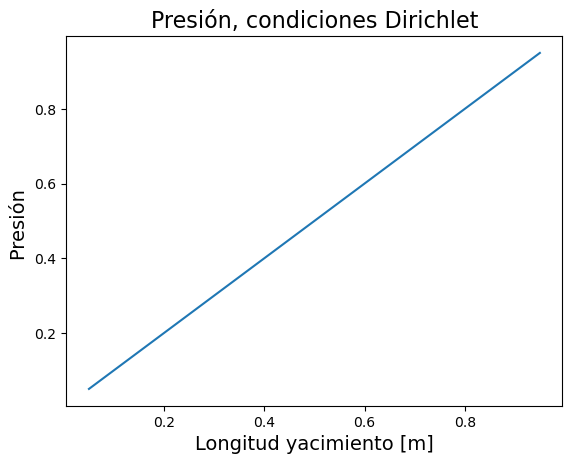

In [49]:
# Graficar la presión
plt.plot(x,p_D)
plt.title('Presión, condiciones Dirichlet', fontsize=16)
plt.xlabel('Longitud yacimiento [m]', fontsize=14)
plt.ylabel('Presión ', fontsize=14)